In [4]:
# import sys
# from pathlib import Path 
# file = Path('__file__').resolve()
# parent, root = file.parent, file.parents[1]
# sys.path.append(str(root))
from detection.services.service import get_image, visualize_bbox, convertFromJson, convertToXYmax

In [2]:
from service_loader import sys_append_abs
sys_append_abs()

In [3]:
import os
import glob
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [3]:
ROOT = Path('__file__').resolve().parents[2]

In [4]:
content_path = glob.glob(os.path.join(ROOT, 'data/content/*'))
content_path

['/root/workspace/work/Digital-Tashkent/Signs/data/content/23.06.2022',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/6 Otabek 06.21',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/27062022',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/28.06.2022 full',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/3',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/19.07.2022',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/30062022',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/15082022',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/7 Otabek 06.21',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/05.07-22.08',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/5 Otabek 06.21',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/13082022',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/1',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/2',
 '/root/w

In [5]:
list_train = glob.glob(os.path.join(ROOT, 'data/content/*/*.csv'))
list_train

['/root/workspace/work/Digital-Tashkent/Signs/data/content/23.06.2022/23.06.2022 tr_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/6 Otabek 06.21/Example_Project_Attributes_included_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/27062022/27062022_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/28.06.2022 full/28062022 from 00010F_4 .csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/28.06.2022 full/28062022 to 00010F_4.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/3/khakimov- sign project 3_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/19.07.2022/19_07_22_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/30062022/30.06.22 (113415, 115029, 123930)_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/15082022/15.08.2022 full_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/7 Otabek 06.21/Example_Project_Attributes_

In [6]:
data = pd.read_csv(list_train[0])
data

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,NO20220623-160950-000054F_1.JPG,610139,{},4,0,"{""name"":""rect"",""x"":1764,""y"":320,""width"":153,""h...","{""Name"":""5.33"",""Type"":""Informational_sign""}"
1,NO20220623-160950-000054F_1.JPG,610139,{},4,1,"{""name"":""rect"",""x"":1750,""y"":384,""width"":187,""h...","{""Name"":""2.1"",""Type"":""Priority_sign""}"
2,NO20220623-160950-000054F_1.JPG,610139,{},4,2,"{""name"":""rect"",""x"":1098,""y"":549,""width"":53,""he...","{""Name"":""2.1"",""Type"":""Priority_sign""}"
3,NO20220623-160950-000054F_1.JPG,610139,{},4,3,"{""name"":""rect"",""x"":1570,""y"":616,""width"":65,""he...","{""Name"":""5.16.2"",""Type"":""Informational_sign""}"
4,NO20220623-160950-000054F_2.JPG,450237,{},2,0,"{""name"":""rect"",""x"":1047,""y"":478,""width"":58,""he...","{""Name"":""2.1""}"
...,...,...,...,...,...,...,...
657,NO20220623-200545-000100F_2.JPG,354621,{},3,1,"{""name"":""rect"",""x"":2071,""y"":477,""width"":104,""h...","{""Name"":""3.4"",""Type"":""Forbidding_sign""}"
658,NO20220623-200545-000100F_2.JPG,354621,{},3,2,"{""name"":""rect"",""x"":2081,""y"":591,""width"":104,""h...","{""Name"":""7.3.3"",""Type"":""Additional_info_sign""}"
659,NO20220623-200845-000101F_1.JPG,338293,{},2,0,"{""name"":""rect"",""x"":1720,""y"":406,""width"":133,""h...","{""Name"":""5.16.2"",""Type"":""Informational_sign""}"
660,NO20220623-200845-000101F_1.JPG,338293,{},2,1,"{""name"":""rect"",""x"":1498,""y"":624,""width"":84,""he...","{""Name"":""5.46"",""Type"":""Informational_sign""}"


In [7]:
data = convertFromJson(data)
data = convertToXYmax(data)

/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:68: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:82: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)


<AxesSubplot: >

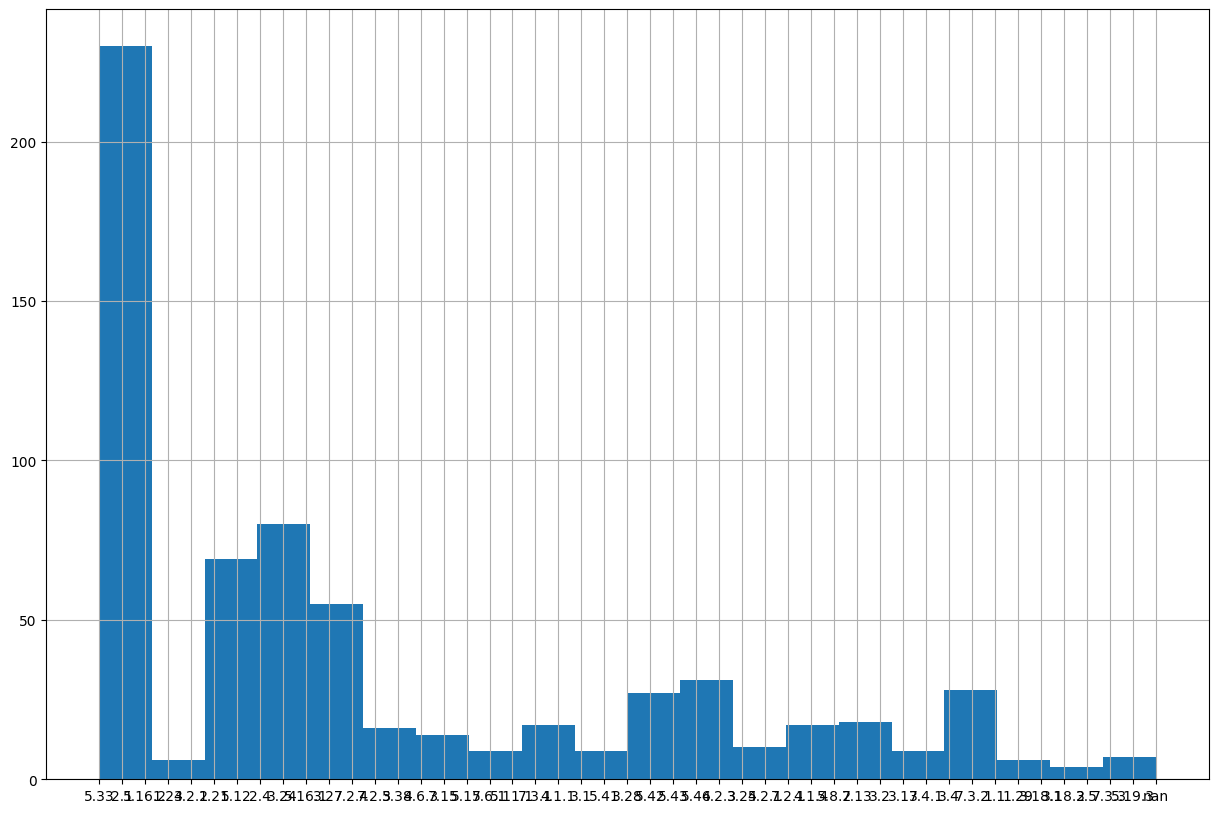

In [8]:
data['name'].hist(figsize=(15, 10), bins=20)

In [ ]:
def joiner(csv_item):
    data = pd.read_csv(csv_item)


In [18]:
pth = '/'.join(list_train[0].split('/')[:-1])
pth = os.path.join(pth, data.iloc[0]['image'])
img = cv2.imread(pth)